<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/filtrofir2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La función aplicar_fir(N) implementa un filtro FIR (Finite Impulse Response), que es un tipo de filtro digital utilizado en procesamiento de señales.
Un filtro FIR es un sistema lineal de respuesta finita, lo que significa que su respuesta a una señal de entrada es completamente determinada por un número finito de coeficientes. La salida y[n] de un filtro FIR de orden N está dada por la convolución entre la señal de entrada x[n] y la respuesta al impulso b[n]:

Donde:

b[k] son los coeficientes del filtro.

x[n-k] son los valores de la señal de entrada retrasados.

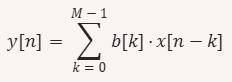

Algunos calculos.
Asumiendo que:
M = 4,
b = [0.2, 0.2, 0.2, 0.2],
x = [-0.50640335, -0.02957428, -0.47714175, 0.37072688]
Tenemos:
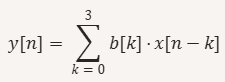

Cuando aplicamos np.convolve(x, b, mode='same'), hay diferentes maneras de tratar los bordes del arreglo. Una de las más comunes es rellenar con ceros (zero-padding), que es lo que asumimos aquí. Esto significa que los valores inexistentes se consideran como 0, permitiendo calcular y[0] así:
* Hallando 𝑦[0]:

𝑦[0] = (0.2 ⋅ 𝑥[-2]) + (0.2 ⋅ 𝑥[-1]) + (0.2 ⋅ 𝑥[0]) + (0.2 ⋅ 𝑥[1])

𝑦[0] = (0.2 ⋅ 0) + (0.2 ⋅ 0) + (0.2 ⋅ (-0.50640335)) + (0.2 ⋅ (-0.02957428))

𝑦[0] = (0) + (0) + (0.2 ⋅ -0.62457613) + (0.2 ⋅ 0.16309028)

y[0] = -0.107195526

* Hallando 𝑦[1]:

𝑦[1] = (0.2 ⋅ 𝑥[-1]) + (0.2 ⋅ 𝑥[0]) + (0.2 ⋅ 𝑥[1]) + (0.2 ⋅ 𝑥[2])

𝑦[1] = (0.2 ⋅ 0) + (0.2 ⋅ (-0.50640335)) + (0.2 ⋅ (-0.02957428)) + (0.2 ⋅ (-0.47714175))

y[1] = -0.20262388




In [17]:
# Este código es genial para visualizar el efecto de un filtro FIR en una señal ruidosa
import numpy as np
import matplotlib.pyplot as plt
# Proporciona herramientas interactivas en Jupyter Notebook, como interact y IntSlider.
from ipywidgets import interact, IntSlider

# Señal base
# Crea un array t con 500 valores equidistantes entre 0 y 1 (esto representa el tiempo).
t = np.linspace(0, 1, 500)

# Se genera una señal senoidal de frecuencia 5 Hz (sin(2 * pi * 5 * t)).
# Se añade ruido aleatorio (0.5 * np.random.randn(len(t))) para simular una señal real con interferencias.
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

def aplicar_fir(N):
    # Se define la función que aplica un filtro FIR de orden N. Si N es menor que 1, se ajusta a 1.
    if N < 1: N = 1
    # Creación del filtro FIR:
    # Se crea un filtro FIR de promedio móvil, donde N determina la cantidad de muestras que se promedian.
    b = np.ones(N) / N

    # Se aplica la convolución entre la señal x y el filtro b, manteniendo el mismo tamaño (mode='same').
    y = np.convolve(x, b, mode='same')

    # Gráfico de la señal en el dominio del tiempo
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label="Señal ruidosa", alpha=0.3)
    plt.plot(t, y, label=f"FIR orden {N}", linewidth=2)
    plt.title("Filtro FIR: comparación con distinto orden")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    T_s = t[1] - t[0]  # Intervalo de muestreo
    f_c = 1 / (2 * N * T_s)
    print(f"Frecuencia de corte estimada: {f_c:.2f} Hz")

# Se usa interact para crear una interfaz donde N puede ajustarse con un IntSlider.
# El slider permite valores entre 1 y 30, con pasos de 2 y un valor inicial de 5.
# Al cambiar el valor de N, se llama automáticamente a la función aplicar_fir(N) y se actualiza la gráfica.
interact(aplicar_fir, N=IntSlider(min=1, max=30, step=2, value=5, description='Orden FIR'));

interactive(children=(IntSlider(value=5, description='Orden FIR', max=30, min=1, step=2), Output()), _dom_clas…